In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv("Diwali_Sales_Data.csv",encoding="latin1")
data.shape
data.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
data.drop(["Status","unnamed1"],axis=1,inplace =True)
pd.isnull(data).sum() #Here we check is there any null value in column 

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
data["Amount"]=data["Amount"].fillna(data["Amount"].mean())

In [11]:
pd.isnull(data).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [12]:
#Change the Data Type
data["Amount"]=data["Amount"].astype("int")

In [13]:
data["Amount"].dtype

dtype('int64')

In [30]:
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.609901
std,1.716125e+03,12.754122,0.493632,1.115047,5219.569169
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [41]:
#Exporatory Data Analysis 

#According Gender

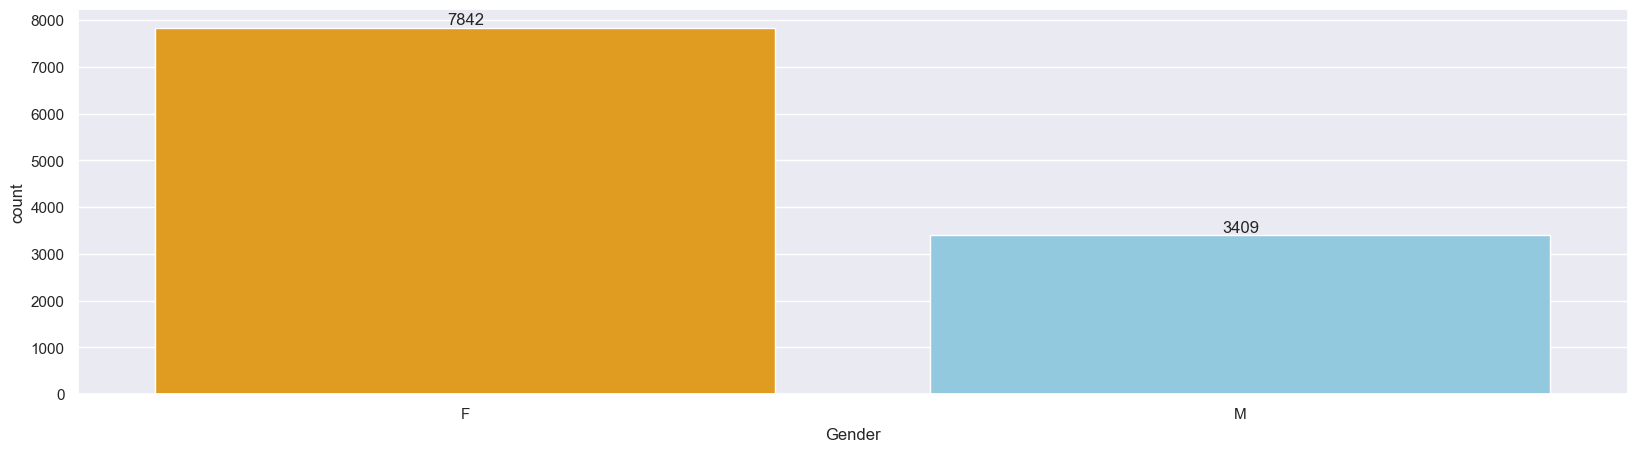

In [14]:
ax=sns.countplot(x="Gender", data=data, hue="Gender", palette={"M": "skyblue", "F": "orange"}, legend=False)

for bar in ax.containers:
    ax.bar_label(bar)

In [42]:
#According Age

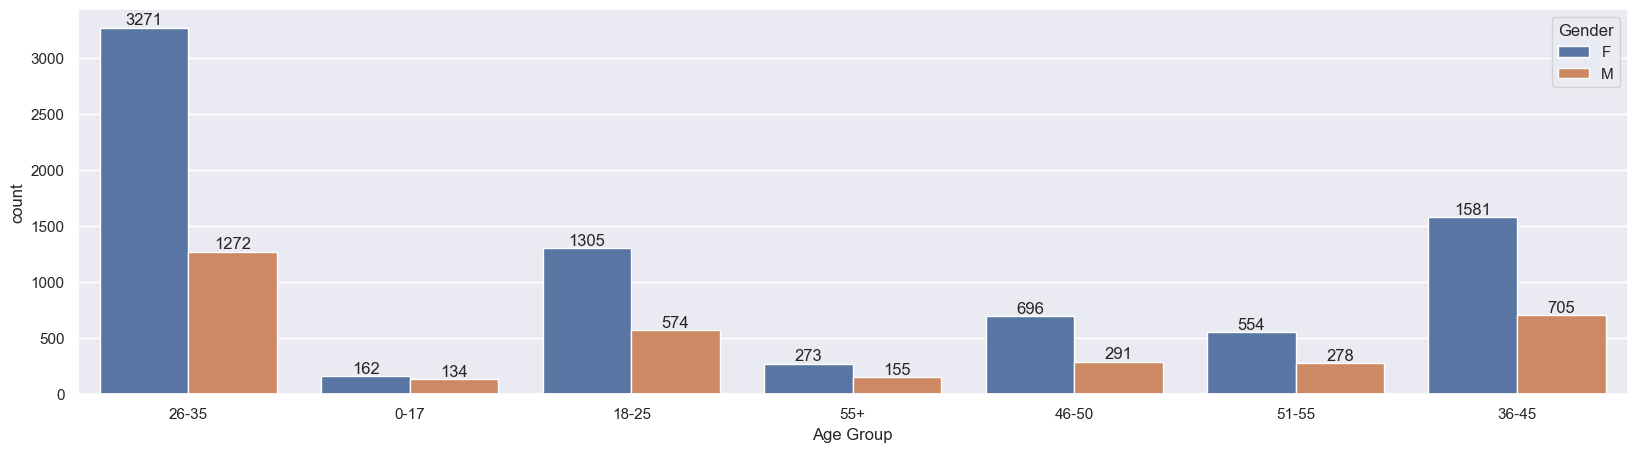

In [15]:
ax=sns.countplot(data=data,x="Age Group",hue="Gender")

for bar in ax.containers:
    ax.bar_label(bar)

In [48]:
#According to State

<Axes: xlabel='State', ylabel='Orders'>

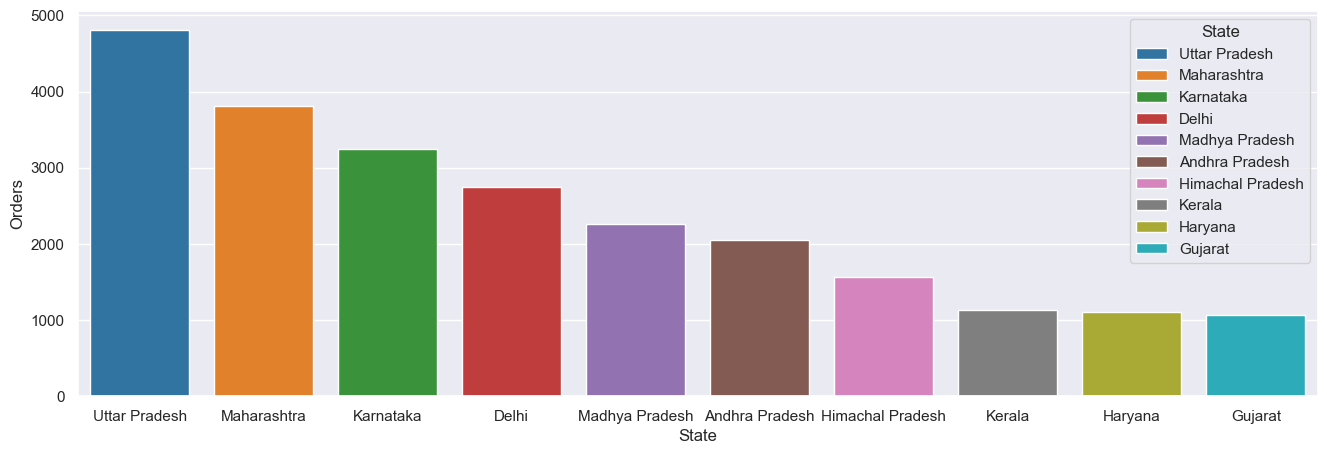

In [67]:
sales_state = data.groupby("State", as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False).head(10)

# Set figure size
sns.set(rc={'figure.figsize': (16, 5)})

# Use x as hue to avoid deprecation warning and apply different colors
sns.barplot(data=sales_state, x="State", y="Orders", hue="State", palette="tab10", legend=True)

<Axes: xlabel='State', ylabel='Amount'>

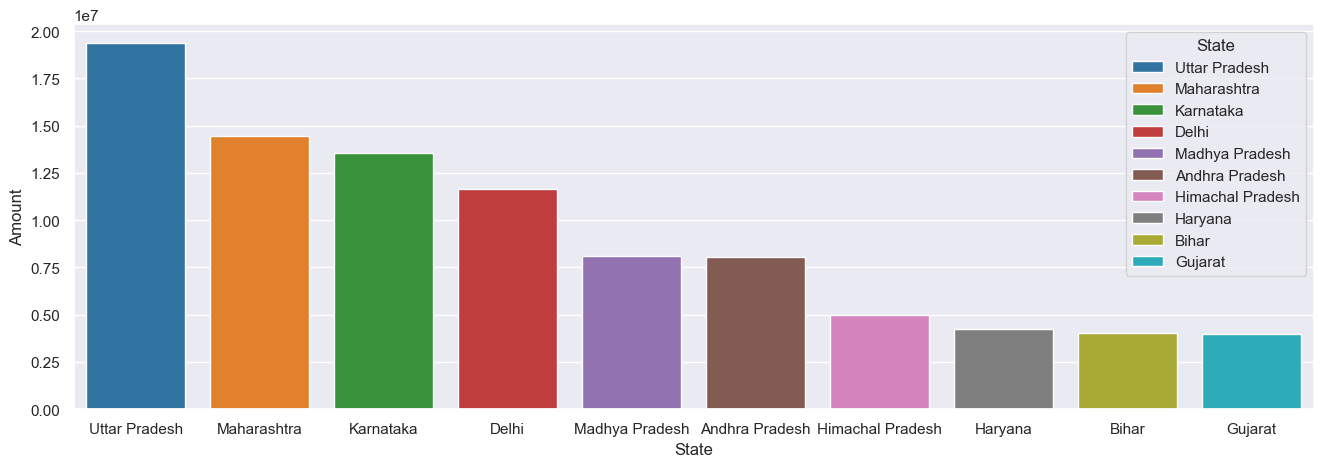

In [78]:
#Total Amount and Sales 
# Group and sort the data
sales_state = data.groupby("State", as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)

# Set figure size
sns.set(rc={'figure.figsize': (16, 5)})

# Bar plot
sns.barplot(data=sales_state, x="State", y="Amount", hue="State",palette="tab10", legend=True)

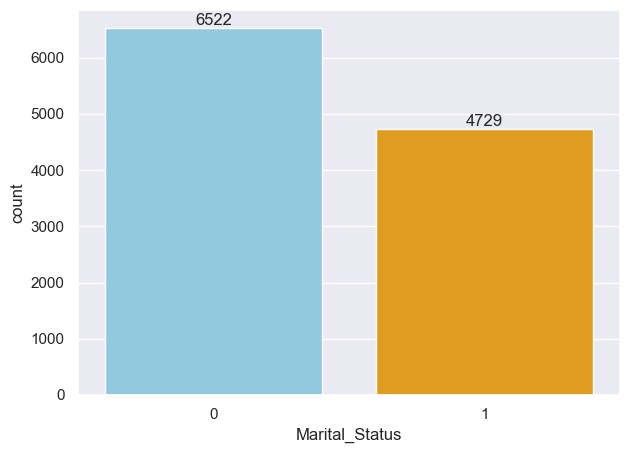

In [80]:
sns.set(rc={"figure.figsize": (7, 5)})

# Fix: keys in palette must match the dtype of "Marital_Status"
ax = sns.countplot(
    data=data,
    x="Marital_Status",
    hue="Marital_Status",
    palette={0: "skyblue", 1: "orange"},
    legend=False
)

# Add bar labels
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

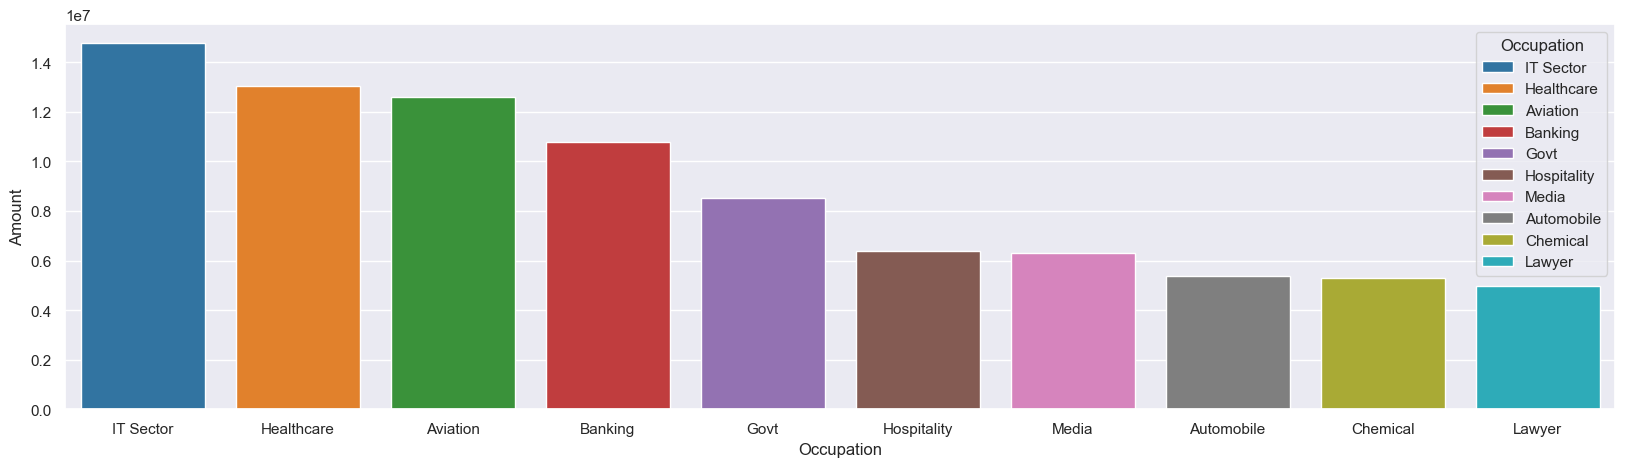

In [17]:
sales_state = data.groupby("Occupation", as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)
sns.set(rc={"figure.figsize":(20,5)})
sns.barplot(data = sales_state, x="Occupation",y="Amount", hue="Occupation",palette="tab10", legend=True)

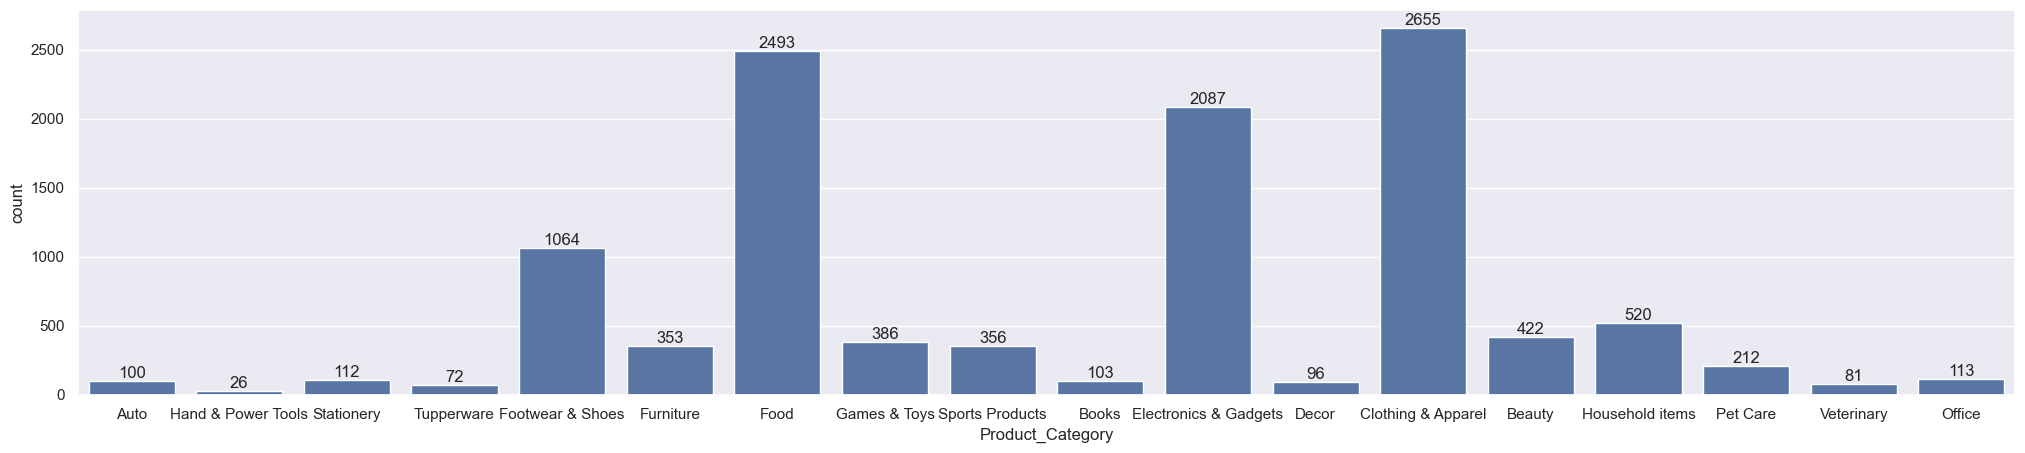

In [19]:
sns.set(rc={"figure.figsize":(25,5)})
ax=sns.countplot(data=data,x="Product_Category")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

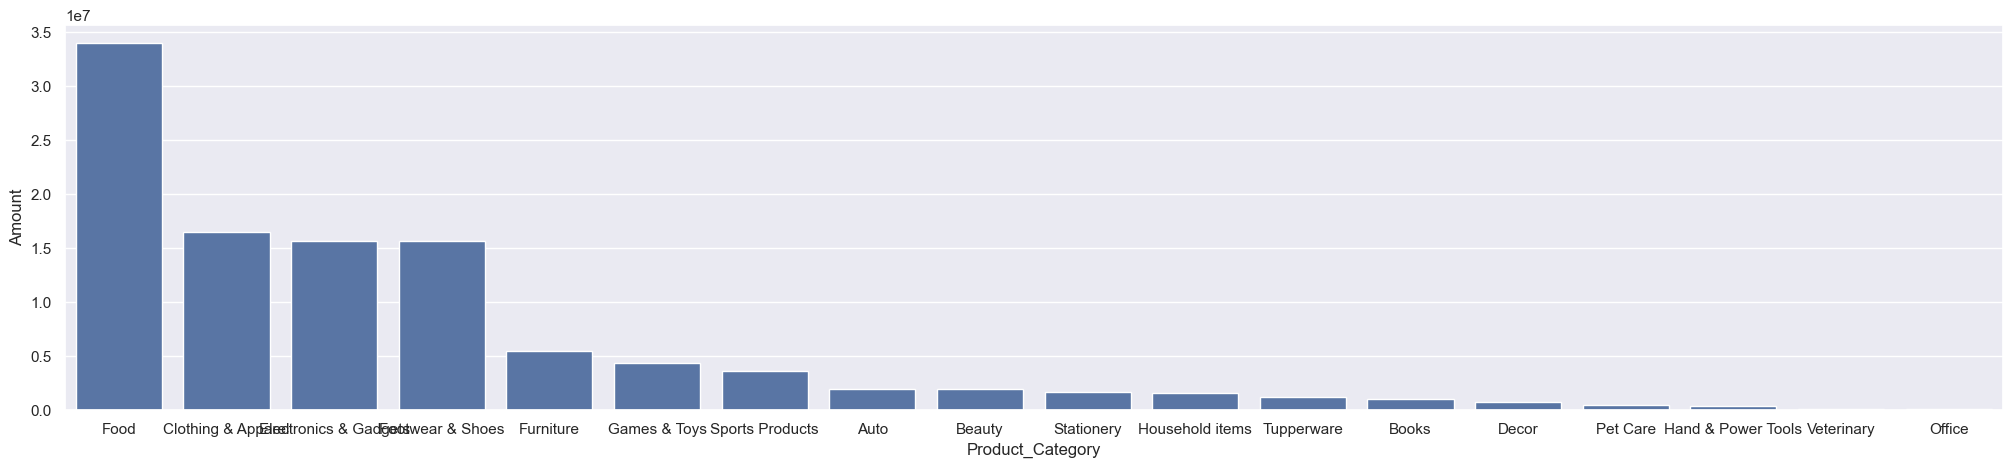

In [23]:
sales_state=data.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

sns.set(rc={"figure.figsize":(25,5)})
sns.barplot(data=sales_state,x="Product_Category",y="Amount")

Conclusion :

Married women age group 26-35 yrs from UP,Maharashtra and Karnataka working in IT, HealthCare and Aviation are more Likely to buy products From Food
, Colthing and Electronics Category 